In [1]:
!pip install nltk

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import os
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import multiprocessing
import nltk
from sklearn.model_selection import train_test_split
nltk.download("stopwords") 

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [75]:
col_names=["target", "ids", "date", "flag", "user", "text"]
df1=pd.read_csv("/content/Tweets.csv",encoding="ISO-8859-1",names=col_names)

In [76]:
df1

,target,ids,date,flag,user,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
...,...,...,...,...,...,...
1599995,4,2193601966,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,AmandaMarie1028,Just woke up. Having no school is the best fee...
1599996,4,2193601969,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,TheWDBoards,TheWDB.com - Very cool to hear old Walt interv...
1599997,4,2193601991,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,bpbabe,Are you ready for your MoJo Makeover? Ask me f...
1599998,4,2193602064,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,tinydiamondz,Happy 38th Birthday to my boo of alll time!!! ...


In [77]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600000 entries, 0 to 1599999
Data columns (total 6 columns):
 #   Column  Non-Null Count    Dtype 
---  ------  --------------    ----- 
 0   target  1600000 non-null  int64 
 1   ids     1600000 non-null  int64 
 2   date    1600000 non-null  object
 3   flag    1600000 non-null  object
 4   user    1600000 non-null  object
 5   text    1600000 non-null  object
dtypes: int64(2), object(4)
memory usage: 73.2+ MB


In [78]:
df1.describe(include='all')

,target,ids,date,flag,user,text
count,1.600000e+06,1.600000e+06,1600000,1600000,1600000,1600000
unique,NaN,NaN,774363,1,659775,1581466
top,NaN,NaN,Mon Jun 15 12:53:14 PDT 2009,NO_QUERY,lost_dog,isPlayer Has Died! Sorry
freq,NaN,NaN,20,1600000,549,210
mean,2.000000e+00,1.998818e+09,NaN,NaN,NaN,NaN
std,2.000001e+00,1.935761e+08,NaN,NaN,NaN,NaN
min,0.000000e+00,1.467810e+09,NaN,NaN,NaN,NaN
25%,0.000000e+00,1.956916e+09,NaN,NaN,NaN,NaN
50%,2.000000e+00,2.002102e+09,NaN,NaN,NaN,NaN
75%,4.000000e+00,2.177059e+09,NaN,NaN,NaN,NaN


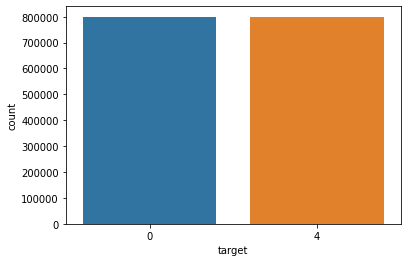

In [80]:
sns.countplot(x=df1["target"])

In [82]:
df1.drop([ "ids", "date", "flag", "user"],axis=1)

,target,text
0,0,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,is upset that he can't update his Facebook by ...
2,0,@Kenichan I dived many times for the ball. Man...
3,0,my whole body feels itchy and like its on fire
4,0,"@nationwideclass no, it's not behaving at all...."
...,...,...
1599995,4,Just woke up. Having no school is the best fee...
1599996,4,TheWDB.com - Very cool to hear old Walt interv...
1599997,4,Are you ready for your MoJo Makeover? Ask me f...
1599998,4,Happy 38th Birthday to my boo of alll time!!! ...


In [84]:
df1["target"]=df1["target"].replace(4,1)

In [86]:
df1.tail(20)

,target,ids,date,flag,user,text
1599980,1,2193578679,Tue Jun 16 08:38:56 PDT 2009,NO_QUERY,puchal_ek,@myheartandmind jo jen by nemuselo zrovna tÃ© ...
1599981,1,2193578716,Tue Jun 16 08:38:57 PDT 2009,NO_QUERY,youtubelatest,Another Commenting Contest! [;: Yay!!! http:/...
1599982,1,2193578739,Tue Jun 16 08:38:57 PDT 2009,NO_QUERY,Mandi_Davenport,@thrillmesoon i figured out how to see my twee...
1599983,1,2193578758,Tue Jun 16 08:38:57 PDT 2009,NO_QUERY,xoAurixo,"@oxhot theri tomorrow, drinking coffee, talkin..."
1599984,1,2193578847,Tue Jun 16 08:38:57 PDT 2009,NO_QUERY,RobFoxKerr,You heard it here first -- We're having a girl...
1599985,1,2193578982,Tue Jun 16 08:38:58 PDT 2009,NO_QUERY,LISKFEST,"if ur the lead singer in a band, beware fallin..."
1599986,1,2193579087,Tue Jun 16 08:38:58 PDT 2009,NO_QUERY,marhgil,@tarayqueen too much ads on my blog.
1599987,1,2193579092,Tue Jun 16 08:38:58 PDT 2009,NO_QUERY,cathriiin,@La_r_a NEVEER I think that you both will get...
1599988,1,2193579191,Tue Jun 16 08:38:59 PDT 2009,NO_QUERY,tellman,@Roy_Everitt ha- good job. that's right - we g...
1599989,1,2193579211,Tue Jun 16 08:38:59 PDT 2009,NO_QUERY,jazzstixx,@Ms_Hip_Hop im glad ur doing well


In [87]:
data=df1["text"]
labels=np.array(df1["target"])


In [88]:
from nltk.corpus import stopwords
import string
stop_words = set(stopwords.words('english'))
punctuations=list(string.punctuation)
stop_words.update(punctuations)

In [89]:
import re
def split_words(text):
    words=text.split()
    return words

def remove_punctuations(words):
    re_punc=re.compile('[%s]' % re.escape(string.punctuation))
    word_striped=[re_punc.sub('', w) for w in words]
    return word_striped

def keep_alphabetic(words):
    words = [word for word in words if word.isalpha()]
    return words

def to_lower_case(words):
    # convert to lower case
    words = [word.lower() for word in words]
    return words

def to_sentence(words):
    return ' '.join(words)

def remove_stopwords(words):
    stop_words = set(stopwords.words('english'))
    words = [w for w in words if not w in stop_words]
    return words

def tweet(words):
    tweet_tokenizer=nltk.tokenize.TweetTokenizer(strip_handles=True,reduce_len=True)
    tweet=tweet_tokenizer.tokenize(words)
    return tweet

def denoise_text(text):
    words = split_words(text)
    words = to_lower_case(words)
    words = remove_punctuations(words)
    words = keep_alphabetic(words)
    words = remove_stopwords(words)
    return to_sentence(words)

In [90]:
data = data.apply(denoise_text)

In [91]:
X_train, X_test, y_train, y_test = test = train_test_split(data, labels,test_size=0.20,
                                                           random_state=1,
                                                           stratify = labels)

In [92]:
tokenizer = Tokenizer(num_words=10000, oov_token = '<OOV>')
tokenizer.fit_on_texts(X_train)
word_index = tokenizer.word_index
VOCAB_SIZE = len(word_index)+1
VOCAB_SIZE

606694

In [93]:
maxlen = max([len(x) for x in X_train])
maxlen=60

In [94]:
train_sequences = tokenizer.texts_to_sequences(X_train)
train_padded_sequences = pad_sequences(train_sequences,maxlen=maxlen,padding='post',truncating='post')
test_sequences = tokenizer.texts_to_sequences(X_test)
test_padded_sequences = pad_sequences(test_sequences,maxlen=maxlen,padding='post',truncating='post')

In [95]:
embedding_dim = 32
model = tf.keras.Sequential([
        tf.keras.layers.Embedding(VOCAB_SIZE+1, embedding_dim, input_length=maxlen),
        tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64)),
        tf.keras.layers.Flatten(),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dropout(0.30),
        tf.keras.layers.Dense(embedding_dim,activation='relu'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dropout(0.30),
        tf.keras.layers.Dense(32,activation='relu'),
        tf.keras.layers.Dense(1,activation='sigmoid'),
    ])

In [96]:
model.compile(loss = 'binary_crossentropy',
                optimizer = 'adam',
                metrics = ['accuracy'])

In [97]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 60, 32)            19414240  
                                                                 
 bidirectional (Bidirectiona  (None, 128)              49664     
 l)                                                              
                                                                 
 flatten (Flatten)           (None, 128)               0         
                                                                 
 batch_normalization (BatchN  (None, 128)              512       
 ormalization)                                                   
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense (Dense)               (None, 32)                4

In [99]:
history =    model.fit(train_padded_sequences,
                                               y_train,
                                               validation_data = (test_padded_sequences, y_test),
                                               epochs = 3)

Epoch 1/3
40000/40000 [==============================] - 773s 19ms/step - loss: 0.4191 - accuracy: 0.8057 - val_loss: 0.4357 - val_accuracy: 0.7975
Epoch 2/3
40000/40000 [==============================] - 769s 19ms/step - loss: 0.4119 - accuracy: 0.8089 - val_loss: 0.4358 - val_accuracy: 0.7975
Epoch 3/3
40000/40000 [==============================] - 764s 19ms/step - loss: 0.4056 - accuracy: 0.8124 - val_loss: 0.4356 - val_accuracy: 0.7977


In [105]:
print(X_test.iloc[6],'label: ;',y_test[6])

daughters house cu later great day label: ; 1


In [106]:
tokenizer.sequences_to_texts(test_padded_sequences)[6]

'daughters house cu later great day <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV>'

In [107]:
model.predict(test_padded_sequences)[6]

10000/10000 [==============================] - 39s 4ms/step


array([0.97603375], dtype=float32)